In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file and print rows
data = pd.read_csv("/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv")

data.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [3]:
#information about data, voids, data type

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [4]:
#check for duplicates
data['Incident_ID'].duplicated().sum()

0

In [5]:
#columns name

data.columns

Index(['Incident_ID', 'Date', 'Location', 'Area_Burned (Acres)',
       'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged',
       'Injuries', 'Fatalities', 'Estimated_Financial_Loss (Million $)',
       'Cause'],
      dtype='object')

In [6]:
#data type change from object to dates

data['Date'] = pd.to_datetime(data['Date'])
print(data['Date'].dtype)

datetime64[ns]


In [7]:
#check if all values are converted to dates

print(data['Date'].isna().sum())

0


In [8]:
#build functions for visualizations

def info_fire(x,y,title_,xlabel,ylabel):
    plt.figure(figsize=(7, 4))
    plt.scatter(x,y, color='royalblue',marker='o')
    plt.title(title_,size=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True,color='darkorange',linewidth=0.5)
    plt.show()

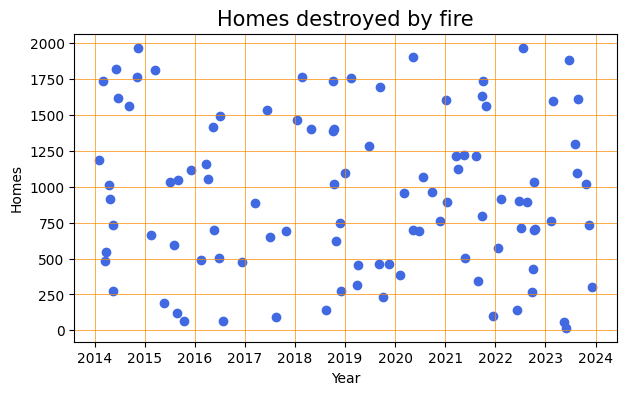

In [9]:
#call the function to visualize the columns I have selected

result1 = info_fire(data['Date'],
                    data['Homes_Destroyed'],
                    'Homes destroyed by fire',
                    xlabel='Year',
                    ylabel='Homes')

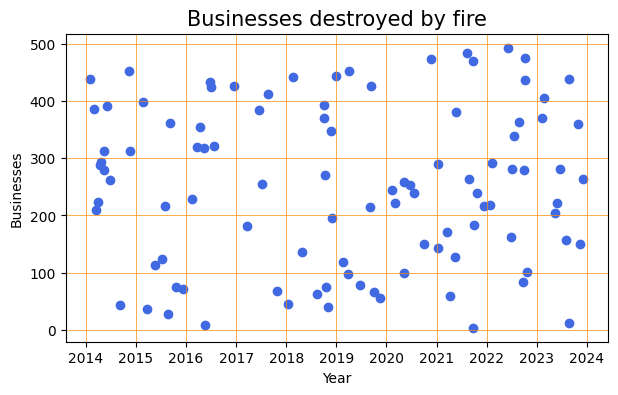

In [10]:
result2 = info_fire(data['Date'],
                    data['Businesses_Destroyed'],
                    'Businesses destroyed by fire',
                    xlabel='Year',
                    ylabel='Businesses')

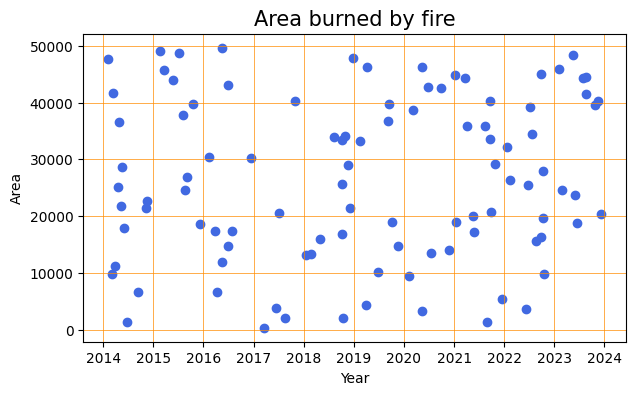

In [11]:
result3 = info_fire(data['Date'],
                    data['Area_Burned (Acres)'],
                    'Area burned by fire',
                    xlabel='Year',
                    ylabel='Area')

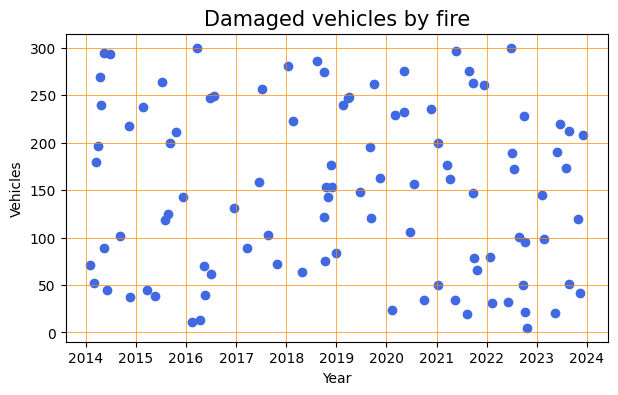

In [12]:
result4 = info_fire(data['Date'],
                    data['Vehicles_Damaged'],
                    'Damaged vehicles by fire',
                    xlabel='Year',
                    ylabel='Vehicles')

In [13]:
#choice of year only
data['Year'] = data['Date'].dt.strftime('%Y')

In [14]:
#build functions for visualizations, creating a mask to select specific elements of the column and group the selected data

def location(county_data,county_name,title,xlabel,ylabel):
    county_data = data[data['Location'] == county_name]
    location_injuries_fatalities = county_data.groupby(['Year'])[['Injuries','Fatalities']].mean()

    location_injuries_fatalities.plot(kind='bar',width=0.5,figsize=(5,6))
    plt.xlabel(xlabel, size =10)
    plt.ylabel(ylabel, size= 10)
    plt.title(title,size=11)
    plt.grid(True)
    plt.show()

In [15]:
#select the unique regions from the location column by creating a column of them

county_unique = [i for i in data['Location'].unique()]
print(county_unique)

['Sonoma County', 'Shasta County', 'Butte County', 'San Diego County', 'Napa Valley', 'Riverside County', 'Santa Barbara County', 'Los Angeles County', 'Mendocino County', 'Orange County']


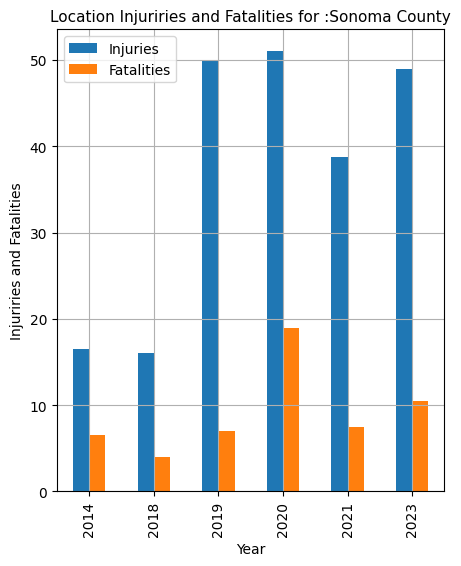

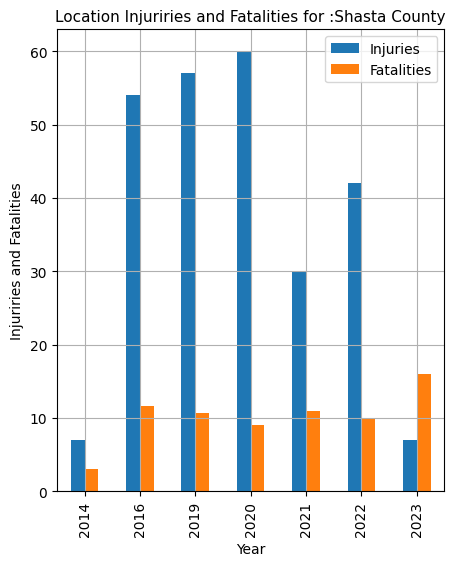

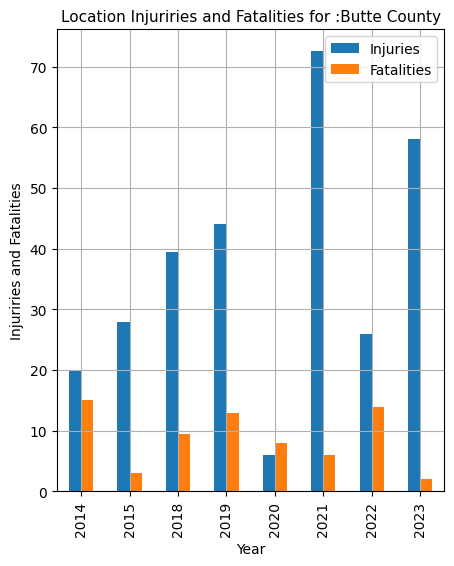

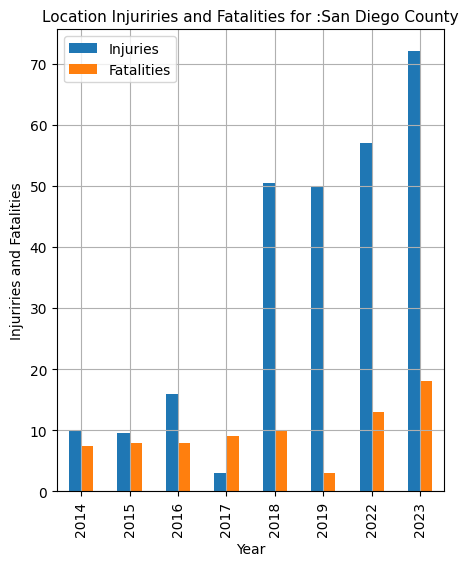

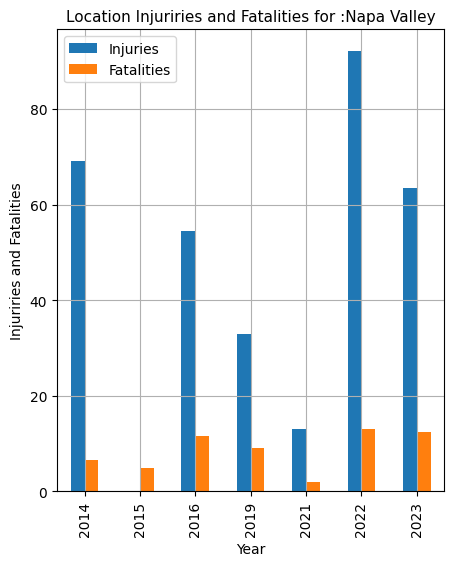

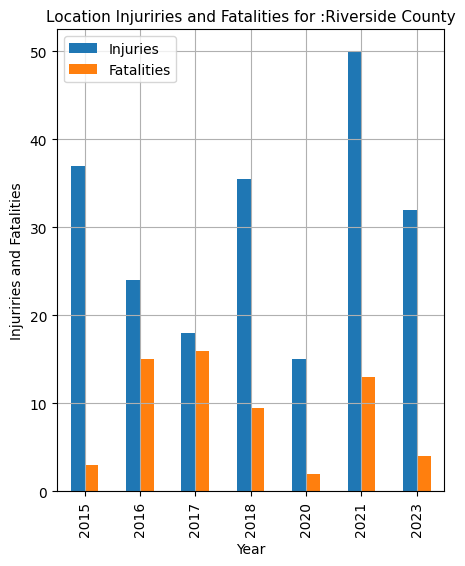

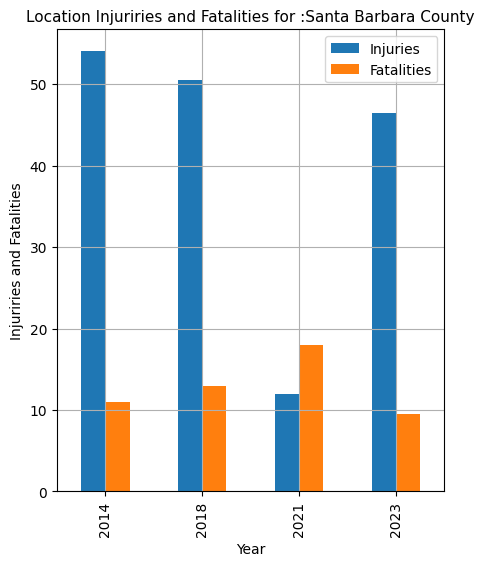

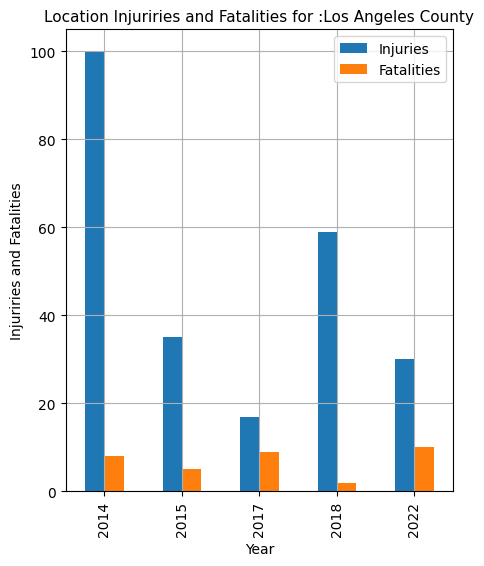

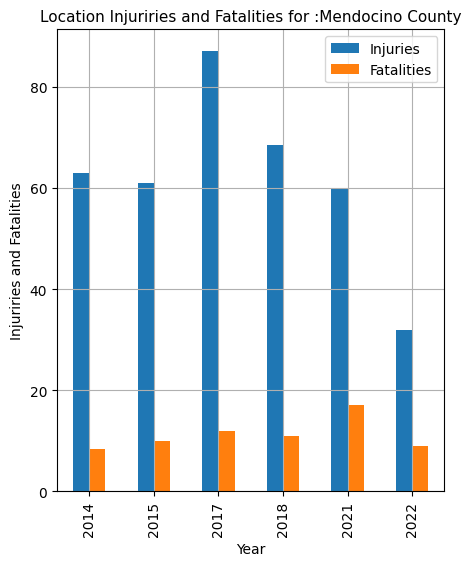

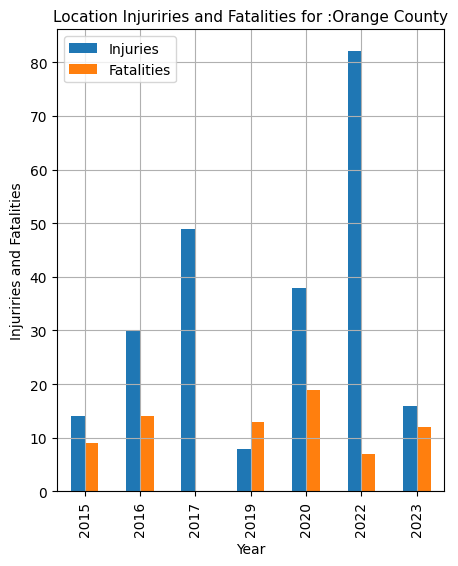

In [16]:
#for each item in the location column, I call the function that is above and make different visualizations for each area separately
#to see how many deaths and injuries each year had from the fire

for county in county_unique:
    result_county_1 = location(
        county_data=county,
        county_name=county,
        title=f'Location Injuriries and Fatalities for :{county}',
        xlabel='Year',
        ylabel='Injuriries and Fatalities'
    )

In [17]:
#I group the Cause and Area Burned columns
cause_area_burned = data.groupby('Cause')['Area_Burned (Acres)'].mean()
print(cause_area_burned)

Cause
Human Activity    27573.763158
Lightning         24832.645161
Unknown           26952.612903
Name: Area_Burned (Acres), dtype: float64


In [18]:
#I put as values ​​the number of damaged areas and as indicators the reason why the disasters happened
x = cause_area_burned.index
y = cause_area_burned.values

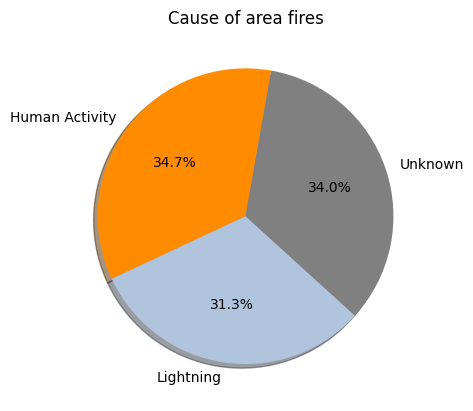

In [19]:
#I created a pie chart with a list of the colors I chose
colors = ['darkorange', 'lightsteelblue', 'grey']
fig1, ax1 = plt.subplots()
plt.title('Cause of area fires')
ax1.pie(y, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=80,colors=colors)
plt.show()

In [20]:
#I group the damaged homes and businesses by economic impact, to check what economic impact they have
financial_loss_= data.groupby(['Homes_Destroyed','Businesses_Destroyed'])['Estimated_Financial_Loss (Million $)'].sum()
print(financial_loss_.head())

Homes_Destroyed  Businesses_Destroyed
18               222                     1168.16
60               205                     4458.29
65               75                      1745.67
66               322                     1565.13
95               412                      273.68
Name: Estimated_Financial_Loss (Million $), dtype: float64


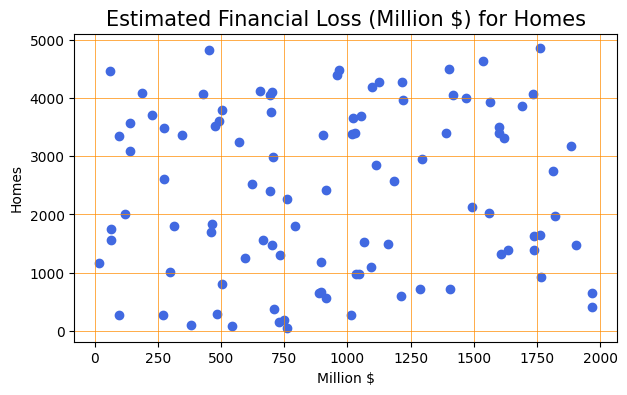

In [21]:
result5 = info_fire(data['Homes_Destroyed'],
                    data['Estimated_Financial_Loss (Million $)'],
                    'Estimated Financial Loss (Million $) for Homes',
                    xlabel='Million $',
                    ylabel='Homes')

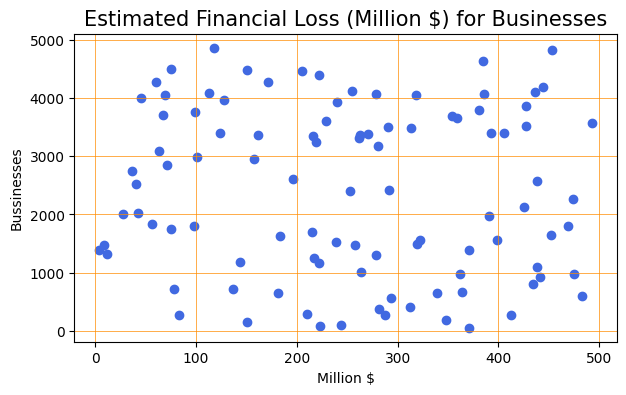

In [22]:
result6 = info_fire(data['Businesses_Destroyed'],
                    data['Estimated_Financial_Loss (Million $)'],
                    'Estimated Financial Loss (Million $) for Businesses',
                    xlabel='Million $',
                    ylabel='Bussinesses')

In [23]:
#I perform correlation analysis to see if one of the variables affects the other
num_columns = ['Area_Burned (Acres)', 'Homes_Destroyed', 
               'Businesses_Destroyed','Vehicles_Damaged', 'Injuries', 
               'Fatalities', 'Estimated_Financial_Loss (Million $)']

correlation_ = data[num_columns].corr()
print(f'the correlation is : {correlation_}')

the correlation is :                                       Area_Burned (Acres)  Homes_Destroyed  \
Area_Burned (Acres)                              1.000000         0.051915   
Homes_Destroyed                                  0.051915         1.000000   
Businesses_Destroyed                             0.028195         0.113493   
Vehicles_Damaged                                -0.136432        -0.073115   
Injuries                                         0.094843         0.015270   
Fatalities                                       0.050394        -0.045863   
Estimated_Financial_Loss (Million $)             0.075187         0.046645   

                                      Businesses_Destroyed  Vehicles_Damaged  \
Area_Burned (Acres)                               0.028195         -0.136432   
Homes_Destroyed                                   0.113493         -0.073115   
Businesses_Destroyed                              1.000000         -0.075566   
Vehicles_Damaged                  

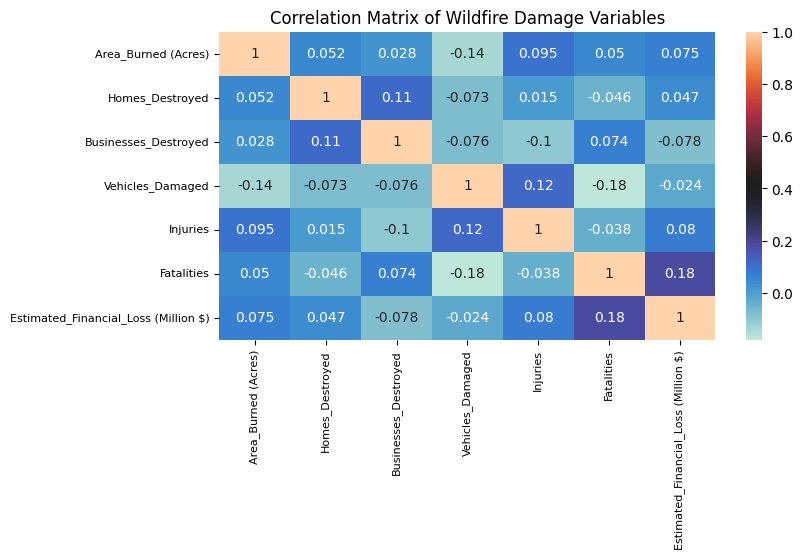

In [24]:
#I make a visualization of the correlation of the variables to see more clearly which variables positively or negatively affect each other
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_,annot=True, cmap='icefire')
plt.title("Correlation Matrix of Wildfire Damage Variables")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [25]:
#I create a function for new visualizations that show the financial impact
def destroyed_year(x,y,title,xlabel,ylabel):
    sns.barplot(data=data,
                x=x,
                y=y,
                estimator='sum',
                errorbar=None,
                palette=sns.color_palette('coolwarm'))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right', size=7)
    plt.grid(True, color='darkorange',linewidth=0.4)


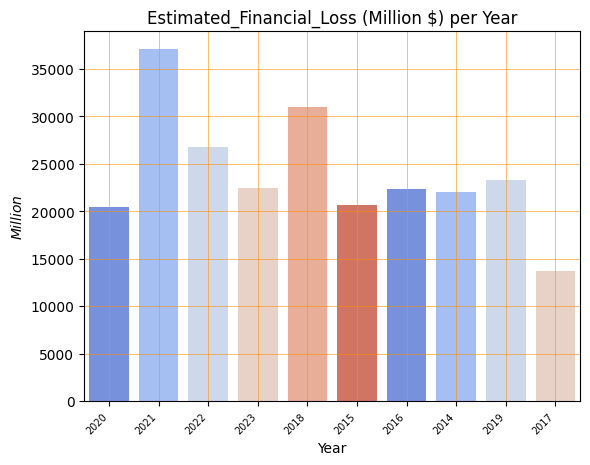

In [26]:
destroyed_y = destroyed_year(x=data['Year'],
                             y=data['Estimated_Financial_Loss (Million $)'],
                             title='Estimated_Financial_Loss (Million $) per Year',
                             xlabel='Year',
                             ylabel='$ Million $')

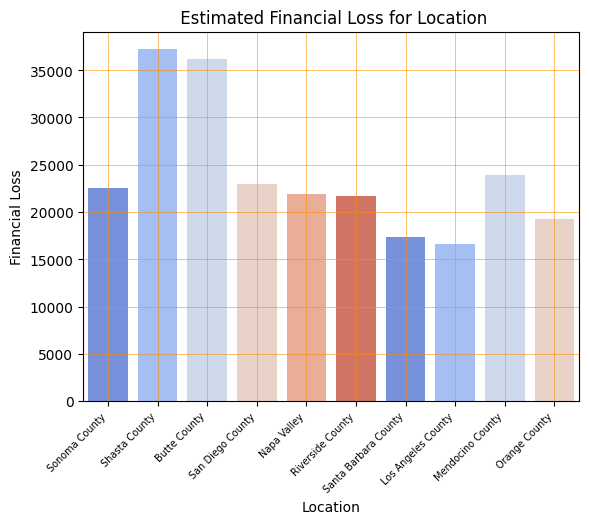

In [27]:
destroyed_y2 = destroyed_year(x=data['Location'],
                              y=data['Estimated_Financial_Loss (Million $)'],
                              title=' Estimated Financial Loss for Location',xlabel='Location',
                              ylabel='Financial Loss')